# Finding Lane Lines
[](https://github.com/ndrplz/self-driving-car)

## 1) Import Packages

In [52]:
# import some useful packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

## 2) Read in Images

type:  <class 'numpy.ndarray'>
shape:  (540, 960, 3)
data type:  uint8


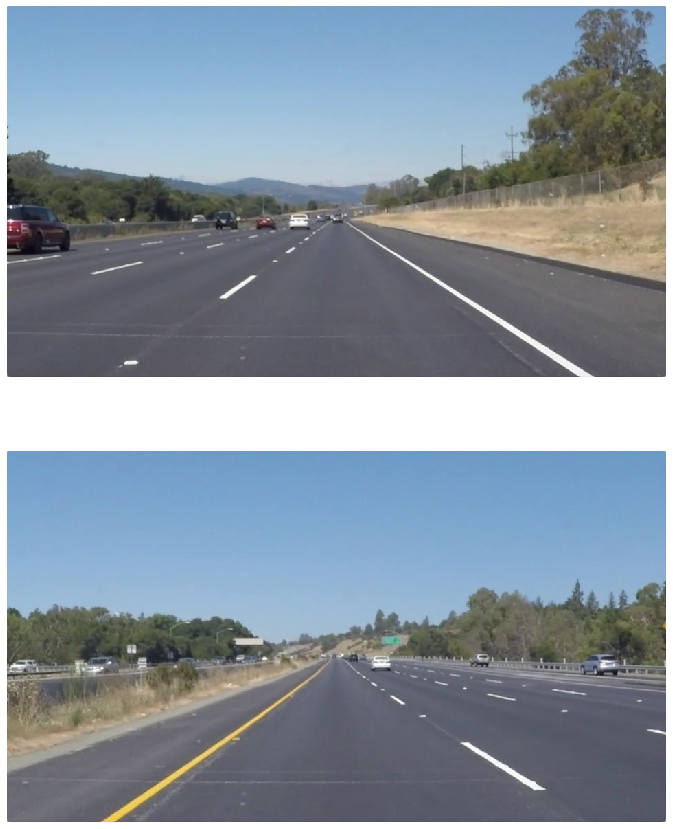

In [53]:
# read in images
img1 = cv2.imread('solidWhiteRight.jpg')
img2 = cv2.imread('solidYellowLeft.jpg')

# print out some stats and plot
print('type: ', type(img1))
print('shape: ', img1.shape)
print('data type: ', img1.dtype)

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 3) Ideas for Lane Detection Pipeline

**Some OpenCV functions and tutorials that might be useful for this project are:**

`cv2.inRange()` for color selection  

`cv2.fillPoly()` for regions selection  

`cv2.line()` to draw lines on an image given endpoints  

`cv2.addWeighted()` to coadd / overlay two images

`cv2.cvtColor()` to grayscale or change color

`cv2.imwrite()` to output images to file  

`cv2.bitwise_and()` to apply a mask to an image

`cv2.Canny()` Canny function

`cv2.GaussianBlur()` Blurring to reduce noise

`cv2.Sobel()` Sobel function

`cv2.hough()` Hough function

...

https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html
- cv2.canny(), cv2.houghLinesP()

<br>

NOTE : Using these functions is not mandatory.

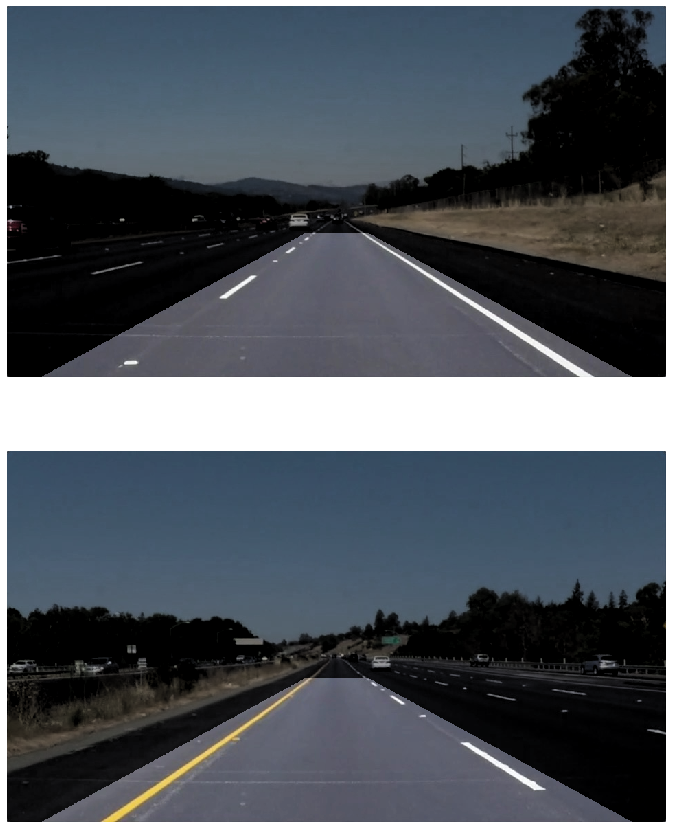

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.figure(figsize=(15,15))

listOfFiles = ['solidWhiteRight.jpg', 'solidYellowLeft.jpg']

for i, file in enumerate(listOfFiles):
    img = cv2.imread(file)
    height, width = img.shape[:2]
    vertices = np.array([[(50, height),
                          (width/2-45, height/2+60), 
                          (width/2+45, height/2+60), 
                          (width-50,height)]], 
                        dtype='int')
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)
    
    mask = np.zeros(img.shape[:2])
    cv2.fillPoly(mask, vertices, 255)
    
    inv_mask = cv2.bitwise_not(mask.astype('uint8'))
    v = cv2.addWeighted(v, 1.0, inv_mask, -0.4, 0.0)
    
    roi = cv2.merge([h,s,v])
    roi = cv2.cvtColor(roi, cv2.COLOR_HSV2RGB)

    plt.subplot(2,1,i+1)
    plt.imshow(roi)
    plt.axis('off')

plt.show()

## 4) Write your own codes for Lane Detection

In [62]:
import numpy as np
import cv2

def region_of_interest(img, vertices): #이걸 하면 사다리꼴 가져올 수 있음
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    return cv2.bitwise_and(img, mask)

In [65]:
def full_pipeline(img): #엣지 검출하라는거지  캐니 엣지랑 허프 변환쓰는거
    #img = cv2.imread(file)
    height, width = img.shape[:2]
    
    vertices = np.array([[(50, height),
                          (width/2-45, height/2+60), 
                          (width/2+45, height/2+60), 
                          (width-50,height)]], dtype='int')
    #가우시안 blur 처리
    blur_img = cv2.GaussianBlur(img, (3,3), 0)
    
    #gray 만들기
    gray_img=cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY) # gray 에서 에지를 뽑은 다음에 뒤처리해라
    
    #캐니를 통해 edge 구하기
    canny_img=cv2.Canny(blur_img,100,180)
    #sobel=cv2.Sobel(gray,cv2.CV_8U,1,0,3)
    
    #roi 사다리꼴 찾아내기
    roi_img=region_of_interest(canny_img,vertices)
    
    #선분 그리기
    #cv2.line(roi_img,(0,0),(200,300),(0,0,255), 3)
    lines = cv2.HoughLinesP(roi_img,1,np.pi/180,10)
    if lines is not None: 
        for line in lines:
            x1,y1,x2,y2 = line[0]
            cv2.line(img,(x1,y1),(x2,y2),(20,20,255),4)
        
        
    result=img
    #cv2.imshow('test', roi_img)
    #cv2.waitKey(0)
    
    return result

In [67]:
listOfFiles = ['solidWhiteRight.jpg', 'solidYellowLeft.jpg']

for i, file in enumerate(listOfFiles):
    img = cv2.imread(file)
    
    result = full_pipeline(img)
    cv2.imshow('lane detection', result)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

# ※ Further improvements

In [7]:
listOfFiles = ['solidWhiteRight.jpg', 'solidYellowLeft.jpg', 'challenge.jpg']

for i, file in enumerate(listOfFiles):
    img = cv2.imread(file)
    
    result = full_pipeline(img)
    cv2.imshow('lane detection', result)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [10]:
def improved_pipeline(img):
    '''
    To do
    '''
    
    return result